In [1]:
'''
#############################################################################
    Jupyter notebook for plotting seaborn graphs with statistical annotations
#############################################################################
# To use this jupyter notebook, you need to add columns for all variables 
# such as experimental group, strain, dye, time.
# Plot one graph at a time, I dont think statannotation can handle > 1 plot
# Please note that this pipeline does not remove outliers yet.
'''

# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Apply theme
sns.set_theme(style="whitegrid")

# Import csv file
df = pd.read_csv("./20220630 #43 W2 and VPA trophs-Batch_Analysis_12082022154450.csv")

# Remove redundant columns
df = df.drop(columns=["Experiment Name", "Specimen Name", "$OP", "GUID", "Record Date"])
df

,Well Name,All Events PE-A Mean,All Events APC-A Mean,All Events Pacific Blue-A Mean,P1 PE-A Mean,P1 APC-A Mean,P1 Pacific Blue-A Mean,P5 PE-A Mean,P5 APC-A Mean,P5 Pacific Blue-A Mean,...,P3 PE-A Mean,P3 APC-A Mean,P3 Pacific Blue-A Mean,P4 PE-A Mean,P4 APC-A Mean,P4 Pacific Blue-A Mean,group,stain,strain,time
0,no stain,25,73,39,23,58,36,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hoerchst PBlue,25,75,157,25,63,283,63.0,129.0,4542.0,...,43.0,112.0,1003.0,75.0,139.0,6670.0,NaN,NaN,NaN,NaN
2,MitoSox PE,371,76,43,848,60,40,119.0,307.0,10375.0,...,NaN,NaN,NaN,119.0,307.0,10375.0,NaN,NaN,NaN,NaN
3,CellRox APC,25,77,44,23,59,38,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B1,185,77,110,350,63,170,9030.0,114.0,3657.0,...,6138.0,96.0,1110.0,11123.0,127.0,5500.0,control,mitosox,W2,1 hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,F10,24,69,50,22,58,52,46.0,92.0,557.0,...,46.0,92.0,557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,F11,25,77,54,24,60,51,51.0,88.0,482.0,...,51.0,88.0,482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,F12,24,69,45,24,59,47,55.0,85.0,480.0,...,55.0,85.0,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,A11,411,957,1173,173,247,429,107.0,166.0,563.0,...,107.0,166.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

control vs. TQ: t-test independent samples, P_val:6.619e-07 t=1.100e+01
control vs. MB: t-test independent samples, P_val:3.592e-05 t=7.028e+00
control vs. TQ&MB: t-test independent samples, P_val:1.797e-01 t=1.443e+00


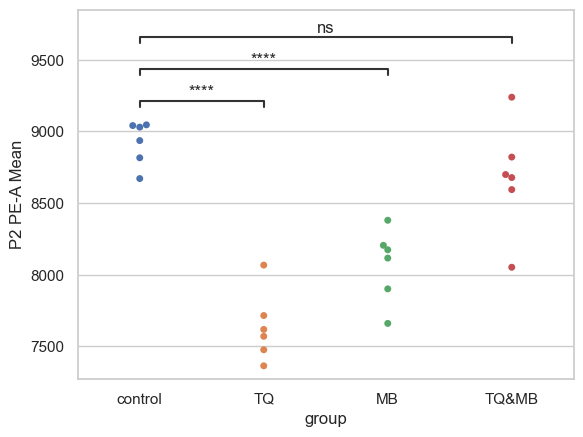

In [11]:
# Isolate all rows required for plot
# To increase specificity, you can add boolean expressions to df.loc. 
# for example = df.loc[(df.time == "1 hour") & (df.strain == "W2")]


df1 = df.loc[(df.time == "1 hour") & (df.strain == "W2")]

# Set parameters
x="group"
y="P2 PE-A Mean"

test="t-test_ind"

# Assign graph
ax = sns.swarmplot(data=df1, x=x, y=y)

# Assign pairs for statistical analysis
pairs = [
    ('control', 'TQ'),
    ('control', 'MB'),
    ('control', 'TQ&MB')
    ]

# load up statannotation.annotator
annotator = Annotator(ax, pairs, data=df1, x=x, y=y)
annotator.configure(test=test)
annotator.apply_and_annotate()

# Save png file and show plot
savefig = x+"_vs_"+y
savefig = savefig.replace(' ','_')
plt.savefig(f"{savefig}.png")
plt.show()

group_vs_P2_PE-A_Mean
